# Data cleaning notebook

In [49]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt
import sys
import os

In [39]:
## ---------------
## CONSTANTS
input_files = ["../data/twitter-datasets/replaced_train_neg_full.txt",
               "../data/twitter-datasets/replaced_train_pos_full.txt"]
vocab_file = "full_vocab_in_stanford.pkl"

In [34]:
## PATHS resolution
abs_path = os.path.abspath(os.path.dirname("."))
input_paths = [os.path.join(abs_path, f) for f in input_files]

ROOT_DIR = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.append(ROOT_DIR)

In [36]:
from tokenizer import load_vocab

In [42]:
## ---------------
## REMOVING DUPLICATED LINES
for f in input_files:
    with open(f, encoding="utf8") as _f:
            uniqlines = set(_f.readlines())
            print(len(uniqlines))
            with open(f[:-3]+"_no_duplicates.txt", 'w', encoding="utf8") as rmdup:
                rmdup.writelines(set(uniqlines))

1085764
1102635


The number of initial lines were 1250000 for each of the input files. 
Hence there were at least 125000 duplicate lines in each file.

In [43]:
# let's work with the duplicates free input files from now on 
input_files = [f[:-3]+"_no_duplicates.txt" for f in input_files]

In [84]:
## -----------------
## REMOVE LINE NUMBERS FROM TEST TEXT
import re

In [85]:
with open(os.path.join(abs_path, "../data/twitter-datasets/test_data.txt"), encoding="utf8") as _f:
            lines = _f.readlines()

In [95]:
lines[2000]

"2001,dead beat ( the dresden files , book 7 ) ( mass market paperback the usa today bestselling author's new dresden fi ... <url>\n"

In [103]:
sub_lines = [re.sub("^([0-9]+,)(.+)","\g<2>",line) for line in lines]

In [102]:
re.sub("^([0-9]+,)(.+)","\g<2>",lines[3])

"<user> no ma'am ! ! ! lol im perfectly fine and not contagious anymore lmao\n"

In [104]:
len(sub_lines)

10000

In [105]:
with open(os.path.join(abs_path, "../data/twitter-datasets/test_data_no_numbers.txt"),"w", encoding="utf8") as nonum:
    nonum.writelines(sub_lines)

## Analysing words

In [45]:
from tokenizer import tokenize_text

In [46]:
positive_raw = open(os.path.join(abs_path, input_files[1]),  "r", encoding="utf8").read()
positive_words = set(tokenize_text(positive_raw))
print("Number of words in the positive tweets file: ",len(positive_words))
negative_raw = open(os.path.join(abs_path, input_files[0]),  "r", encoding="utf8").read()
negative_words = set(tokenize_text(negative_raw))
print("Number of words in the negative tweets file: ",len(negative_words))

Number of words in the positive tweets file:  254011
Number of words in the negative tweets file:  316824


In [47]:
difference_set = negative_words.difference(positive_words) 
print("Number of words in the negative tweets file and not in the positive tweets file: ",len(difference_set))

Number of words in the negative tweets file and not in the positive tweets file:  219682


(-0.5, 399.5, 199.5, -0.5)

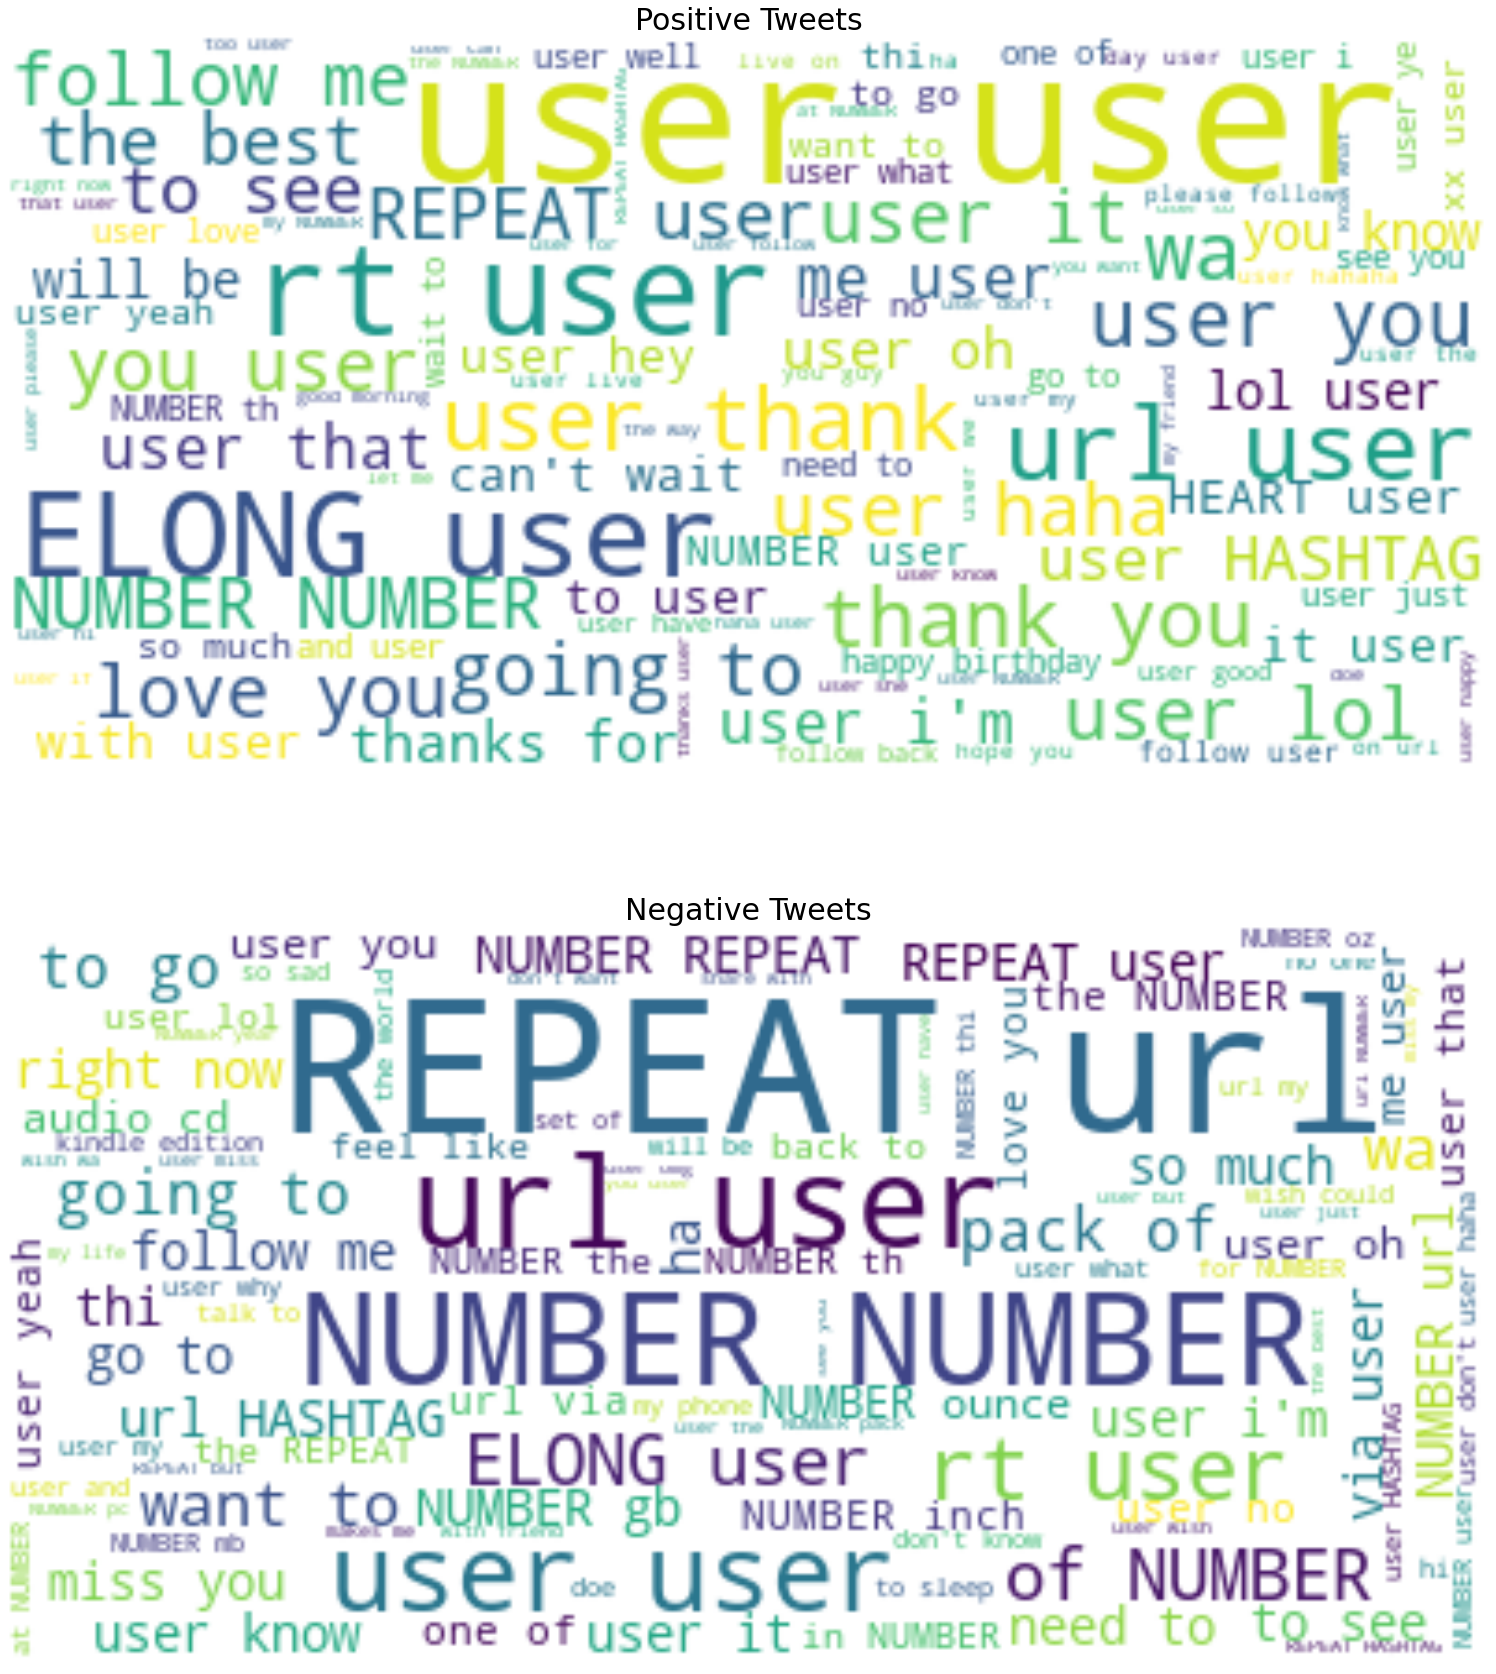

In [52]:
## -----------------
## PLOTTING WORD CLOUDS
fig, ax = plt.subplots(2, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_raw)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_raw)
# Display the generated image:
ax[0].imshow(wordcloud_pos, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_neg, interpolation='bilinear')
ax[1].set_title('Negative Tweets', fontsize=30)
ax[1].axis('off')

In [53]:
vocab = load_vocab(vocab_file) 

In [54]:
words_in_vocab = set(vocab.keys())

In [55]:
def filter_line(line):
    return [word for word in line if word in words_in_vocab]

In [67]:
#How many lines have less than 50% of their words not in the vocabulary? 
empty_lines = []
for f in input_files:
    with open(f, encoding="utf8") as _f:
            lines = set(_f.readlines())
            lines = [tokenize_text(line) for line in lines]
            num_words = [len(line) for line in lines]
            filtered_lines = [filter_line(line) for line in lines]
            filtered_num_words = [len(line) for line in filtered_lines]
    for i,line in enumerate(filtered_lines):
        if filtered_num_words[i]< 0.5*num_words[i]:
            empty_lines.append(line)

In [68]:
len(empty_lines)

124

In [76]:
empty_lines[]

['<elong>']

In [77]:
# average length of empty lines
num_words = [len(line) for line in empty_lines]

In [78]:
import numpy as np

In [79]:
np.array(num_words)

array([1, 0, 1, 1, 4, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 7, 1,
       1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 4, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 8, 1, 1, 1, 1, 0, 0, 0, 3, 0, 4, 2, 1,
       2, 1, 1, 1, 4, 1, 1, 3, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 0, 3, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 4])

In [80]:
np.average(num_words)

1.2580645161290323

In [83]:
# We should delete these lines 
# But since they're such a small number we can leave them 